<font size=6><b>Used Car Price Prediction Project

<font size=3><b>With the COVID 19 impact in the market, we have seen lot of changes in the used car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to COVID 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

<b>This project contains two phase.

<ul>
    <li><b>Data Collection Phase: You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. more the data better the model. In this section you need to scrape the data of used cars from websites (Olx, Cardekho, Cars24 etc.) You need web scraping for this. You have to fetch data for different locations. The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and at last target variable Price of the car. This data is to give you a hint about important variables in used car model. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data. Try to include all types of cars in your data for example - SUV, Sedans, Coupe, Minivan, Hatchback.
</ul>        

<ul>
    <li><b>Model Building Phase: After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the below steps.
</ul>        

<b>
    1. Data Cleaning<br>
    2. Exploratory Data Analysis<br>
    3. Data Pre-processing<br>
    4. Model Building<br>
    5. Model Evaluation<br>
    6. Selecting the best model<br>

 

## Importing the required libraries

In [6]:
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno
import pandas_profiling
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("Used_Car_Data.csv")
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,"2,200 km",Petrol,Manual,"5,25,000"
1,Hyundai,2013,"91,500 km",Diesel,Manual,"5,95,000"
2,Ford,2017,"36,000 km",Diesel,Manual,"7,75,000"
3,Honda,2015,"90,000 km",Diesel,Manual,"4,00,000"
4,Maruti Suzuki,2010,"40,000 km",Petrol,Manual,"2,30,000"
...,...,...,...,...,...,...
9995,Hyundai,2012,"65,000 km",Petrol,Manual,"3,25,000"
9996,Maruti Suzuki,2018,"85,000 km",CNG & Hybrids,Manual,"2,90,000"
9997,Maruti Suzuki,2010,"72,000 km",Petrol,Manual,"3,20,000"
9998,Tata,2012,"70,000 km",Diesel,Manual,"1,85,000"


 Here we are taking a look at the first 5 and last 5 rows of our dataset. It shows that we have a total of 10000 rows and 6 columns present in our dataframe. In the above cell we can see our dataset includes a target label "Used Car Price" column and the remaining feature columns can be used to determine or help in predicting the price of the used cars. Since price is a continous value it makes this to be a **Regression problem!**

<font size=6>**Exploratory Data Analysis (EDA)**

In [3]:
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head()

We have 10000 Rows and 6 Columns in our dataframe


,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,"2,200 km",Petrol,Manual,"5,25,000"
1,Hyundai,2013,"91,500 km",Diesel,Manual,"5,95,000"
2,Ford,2017,"36,000 km",Diesel,Manual,"7,75,000"
3,Honda,2015,"90,000 km",Diesel,Manual,"4,00,000"
4,Maruti Suzuki,2010,"40,000 km",Petrol,Manual,"2,30,000"


<font size=4><b>Column Description:

 <ul>
        <li>Used Car Model - This shows the car model names
        <li>Year of Manufacture - Gives us the year in which the car was made
        <li>Kilometers Driven - Number of kilometers the car the driven    reflecting on the Odometer
        <li>Fuel Type - Shows the fuel type used by the vehicle
        <li>Transmission Type - Gives us the manual or automatic gear shifting mechanism
        <li>Used Car Price - Lists the selling price of the used cars
    </ul>       

In [4]:
df.isna().sum() # checking for missing values

Used Car Model         0
Year of Manufacture    0
Kilometers Driven      0
Fuel Type              0
Transmission Type      0
Used Car Price         0
dtype: int64

Great we have no missing values therefore we won't have to worry about handling missing data. However we do have records with "-" in them which will need to be dealt with.

<AxesSubplot:>

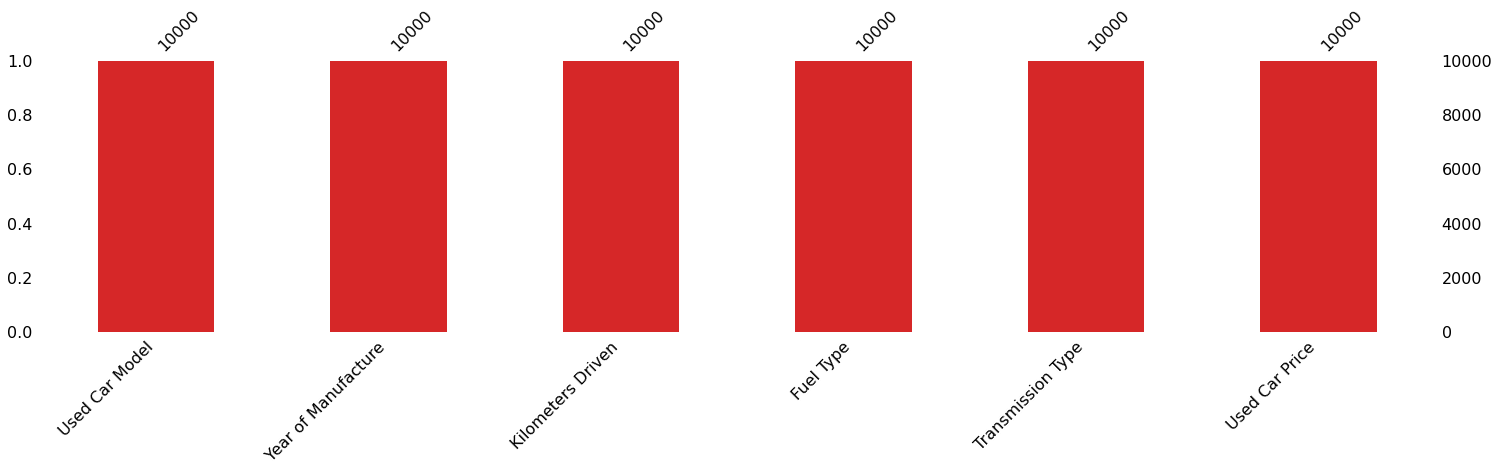

In [7]:
missingno.bar(df, figsize = (25,5), color="tab:red")

In [8]:
print("Missing column values in percentage:")
for col in df:
    percentage = np.round((df[col].isnull().sum()/df.shape[0])*100, 6)
    print(col, ":".format(), percentage, '%')

Missing column values in percentage:
Used Car Model : 0.0 %
Year of Manufacture : 0.0 %
Kilometers Driven : 0.0 %
Fuel Type : 0.0 %
Transmission Type : 0.0 %
Used Car Price : 0.0 %


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Used Car Model       10000 non-null  object
 1   Year of Manufacture  10000 non-null  object
 2   Kilometers Driven    10000 non-null  object
 3   Fuel Type            10000 non-null  object
 4   Transmission Type    10000 non-null  object
 5   Used Car Price       10000 non-null  object
dtypes: object(6)
memory usage: 468.9+ KB


Using the info method we are able to confirm the non null count details as well as the datatype information. We have all 6 columns showing as object datatype therefore some data cleaning is required to fix those details.

In [10]:
df.nunique().sort_values().to_frame("Unique Values")

,Unique Values
Transmission Type,3
Fuel Type,6
Year of Manufacture,31
Used Car Price,940
Kilometers Driven,1094
Used Car Model,2056


With the help of nunique and sort_values methods we can see the number of unique values present in each of the columns in our dataset.

In [11]:
value = ["Transmission Type", "Fuel Type", "Year of Manufacture"]
for col in value:
    print(col)
    print(df[col].value_counts())
    print("="*60)

Transmission Type
Manual       8408
Automatic    1402
-             190
Name: Transmission Type, dtype: int64
Fuel Type
Diesel           5345
Petrol           4386
CNG & Hybrids     108
CNG                57
-                  56
LPG                48
Name: Fuel Type, dtype: int64
Year of Manufacture
2017    1099
2016    1021
2018     983
2015     975
2012     844
2013     802
2014     798
2011     733
2019     642
2010     519
2009     366
2008     300
2007     207
2006     148
2020     132
2005     112
2004      71
2003      55
2002      45
-         44
2000      24
1999      24
2001      16
1997      11
2021      10
1998       9
1994       3
1996       3
1995       2
1983       1
1991       1
Name: Year of Manufacture, dtype: int64


I have listed the unique value information for the columns "Transmission Type", "Fuel Type" and "Year of Manufacture" to see the values and research accordingly for the replacement of the "-" values.

In [12]:
# Data pre processing

df["Kilometers Driven"]=df["Kilometers Driven"].apply(lambda x: x.replace(',','') if x!='-' else '-')
df["Kilometers Driven"]=df["Kilometers Driven"].apply(lambda x: int(x.split(' ')[0]) if x!='-' else 0)
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,2200,Petrol,Manual,"5,25,000"
1,Hyundai,2013,91500,Diesel,Manual,"5,95,000"
2,Ford,2017,36000,Diesel,Manual,"7,75,000"
3,Honda,2015,90000,Diesel,Manual,"4,00,000"
4,Maruti Suzuki,2010,40000,Petrol,Manual,"2,30,000"
...,...,...,...,...,...,...
9995,Hyundai,2012,65000,Petrol,Manual,"3,25,000"
9996,Maruti Suzuki,2018,85000,CNG & Hybrids,Manual,"2,90,000"
9997,Maruti Suzuki,2010,72000,Petrol,Manual,"3,20,000"
9998,Tata,2012,70000,Diesel,Manual,"1,85,000"





The Kilometers Driven column had "-" values plus km extentions that needed to be fixed and changed to the actual numeric data.

In [13]:
try:
    df["Used Car Price"]=df["Used Car Price"].apply(lambda x: x.split(' ')[1] if x!='-' else '0,0')
except IndexError:
    pass

try:
    df["Used Car Price"]=df["Used Car Price"].apply(lambda x: str(x.replace(',', '')))
except ValueError:
    pass

df["Used Car Price"]=df["Used Car Price"].str.strip() # removing extra white space from the column records
df["Used Car Price"]=pd.to_numeric(df["Used Car Price"].str.replace('-','0'), errors='coerce')
df["Used Car Price"]=df["Used Car Price"].astype(float) # converting object to float data type
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,2200,Petrol,Manual,525000.0
1,Hyundai,2013,91500,Diesel,Manual,595000.0
2,Ford,2017,36000,Diesel,Manual,775000.0
3,Honda,2015,90000,Diesel,Manual,400000.0
4,Maruti Suzuki,2010,40000,Petrol,Manual,230000.0
...,...,...,...,...,...,...
9995,Hyundai,2012,65000,Petrol,Manual,325000.0
9996,Maruti Suzuki,2018,85000,CNG & Hybrids,Manual,290000.0
9997,Maruti Suzuki,2010,72000,Petrol,Manual,320000.0
9998,Tata,2012,70000,Diesel,Manual,185000.0


Our target label contained price values but was stored as object datatype therefore we first ensured that it is changed to proper numeric data and then converted to float data type.

In [14]:
df["Year of Manufacture"]=df["Year of Manufacture"].apply(lambda x: int(x.strip()[0:4]) if x!='-' else 0)
median_val_year=df["Year of Manufacture"].median()
df["Year of Manufacture"]=df["Year of Manufacture"].apply(lambda x: x if x!=0 else median_val_year)
df["Year of Manufacture"]=df["Year of Manufacture"].astype(int)
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,2200,Petrol,Manual,525000.0
1,Hyundai,2013,91500,Diesel,Manual,595000.0
2,Ford,2017,36000,Diesel,Manual,775000.0
3,Honda,2015,90000,Diesel,Manual,400000.0
4,Maruti Suzuki,2010,40000,Petrol,Manual,230000.0
...,...,...,...,...,...,...
9995,Hyundai,2012,65000,Petrol,Manual,325000.0
9996,Maruti Suzuki,2018,85000,CNG & Hybrids,Manual,290000.0
9997,Maruti Suzuki,2010,72000,Petrol,Manual,320000.0
9998,Tata,2012,70000,Diesel,Manual,185000.0


Now we are changing the year value from object to integer datatype but before that we have removed all "-" and replaced them with the median year value.

In [15]:
df["Fuel Type"]=df["Fuel Type"].apply(lambda x: x if x!='-' else 'Petrol') # replacing with common fuel type in india
df["Transmission Type"]=df["Transmission Type"].apply(lambda x: x if x!='-' else 'Manual') # common transmission is manual
df["Used Car Model"]=df["Used Car Model"].apply(lambda x: x if x!='-' else 'Hyundai') # common used car model
df["Kilometers Driven"]=df["Kilometers Driven"].apply(lambda x: x if x!='-' else 'None')
avg_usedcar_price=df["Used Car Price"].mean()
df["Used Car Price"]=df["Used Car Price"].apply(lambda x: x if x!='-' else avg_usedcar_price) # average used car prices
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,Hyundai,2017,2200,Petrol,Manual,525000.0
1,Hyundai,2013,91500,Diesel,Manual,595000.0
2,Ford,2017,36000,Diesel,Manual,775000.0
3,Honda,2015,90000,Diesel,Manual,400000.0
4,Maruti Suzuki,2010,40000,Petrol,Manual,230000.0
...,...,...,...,...,...,...
9995,Hyundai,2012,65000,Petrol,Manual,325000.0
9996,Maruti Suzuki,2018,85000,CNG & Hybrids,Manual,290000.0
9997,Maruti Suzuki,2010,72000,Petrol,Manual,320000.0
9998,Tata,2012,70000,Diesel,Manual,185000.0


Here I have ensured that all the remaining columns with "-" records are been treated and replaced with values that made sense researching on Google and using proper replacement techniques.

In [16]:
df.nunique().sort_values().to_frame("Unique Values")

,Unique Values
Transmission Type,2
Fuel Type,5
Year of Manufacture,30
Used Car Price,751
Kilometers Driven,979
Used Car Model,2055


We are checking for the reduction in unique values since we have removed a lot of "-" data that were not captured at the time of web scraping

In [17]:
for col in value:
    print(col)
    print(df[col].value_counts())
    print("="*60)

Transmission Type
Manual       8598
Automatic    1402
Name: Transmission Type, dtype: int64
Fuel Type
Diesel           5345
Petrol           4442
CNG & Hybrids     108
CNG                57
LPG                48
Name: Fuel Type, dtype: int64
Year of Manufacture
2017    1099
2016    1021
2018     983
2015     975
2012     844
2014     842
2013     802
2011     733
2019     642
2010     519
2009     366
2008     300
2007     207
2006     148
2020     132
2005     112
2004      71
2003      55
2002      45
1999      24
2000      24
2001      16
1997      11
2021      10
1998       9
1996       3
1994       3
1995       2
1983       1
1991       1
Name: Year of Manufacture, dtype: int64


Took a look at the initial unique value column data that had less that 50 values.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Used Car Model       10000 non-null  object 
 1   Year of Manufacture  10000 non-null  int32  
 2   Kilometers Driven    10000 non-null  int64  
 3   Fuel Type            10000 non-null  object 
 4   Transmission Type    10000 non-null  object 
 5   Used Car Price       10000 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 429.8+ KB


Here we are able to see that there is 1 float datatype column now along with 2 integer datatype columns and 3 object datatype columns.

In [19]:
df.describe(include="all")

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
count,10000,10000.00000,1.000000e+04,10000,10000,1.000000e+04
unique,2055,NaN,NaN,5,2,NaN
top,Maruti Suzuki,NaN,NaN,Diesel,Manual,NaN
freq,602,NaN,NaN,5345,8598,NaN
mean,NaN,2013.69860,6.914651e+04,NaN,NaN,6.608371e+05
std,NaN,4.02124,5.868048e+04,NaN,NaN,1.204508e+06
min,NaN,1983.00000,0.000000e+00,NaN,NaN,0.000000e+00
25%,NaN,2011.00000,3.500000e+04,NaN,NaN,2.549990e+05
50%,NaN,2014.00000,6.000000e+04,NaN,NaN,4.500000e+05
75%,NaN,2017.00000,9.000000e+04,NaN,NaN,6.770000e+05


Using the describe method I am taking a look at all the column value details and basically it's count, mean, standard deviation, min, 25%, 50%, 75% and max quartile data.

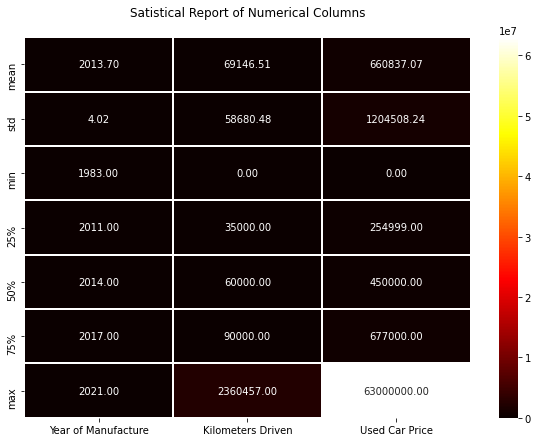

In [20]:
# visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,7))
sns.heatmap(round(df.describe()[1:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="hot")
plt.title("Satistical Report of Numerical Columns\n")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

In the visual representation we have taken into consideration only the numeric data part and can see that the only abnormality is used car maximum price which is higher than all the other values.

<font size=6><b>Visualization

In [21]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

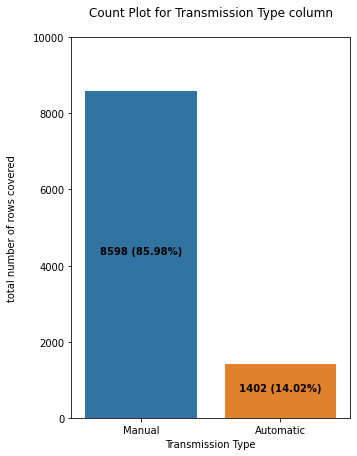

In [22]:
try:
    x = 'Transmission Type'
    k=0
    plt.figure(figsize=[5,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,10000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation: We can see that more number of manual used cars are available as compared to the automatic gear shifting one's in the market. The difference is quite huge and readily available well conditioned used cars have manual gear shifting options.

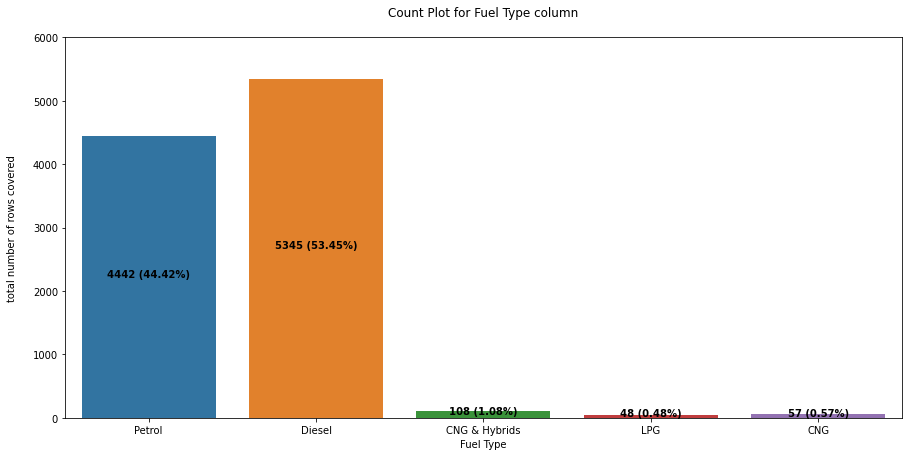

In [23]:
try:
    x = 'Fuel Type'
    k=0
    plt.figure(figsize=[15,7])
    axes = sns.countplot(df[x])
    for i in axes.patches:
        ht = i.get_height()
        mr = len(df[x])
        st = f"{ht} ({round(ht*100/mr,2)}%)"
        plt.text(k, ht/2, st, ha='center', fontweight='bold')
        k += 1
    plt.ylim(0,6000)
    plt.title(f'Count Plot for {x} column\n')
    plt.ylabel(f'total number of rows covered\n')
    plt.show()
    
except Exception as e:
    print("Error:", e)
    pass

Observation: In India most of the cars use diesel engine and the same is being reflected above. Most of the used cars run either on petrol or diesel. We do have a minimal amount of cars that run on LPG, CNG and their hybrid versions.

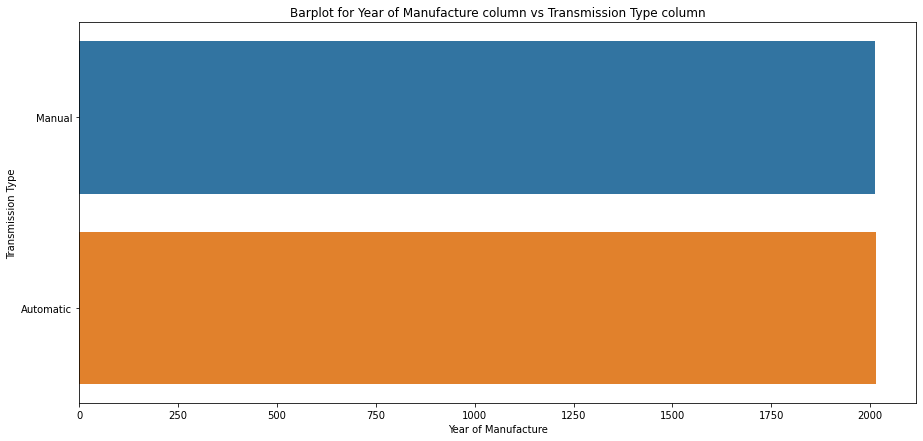

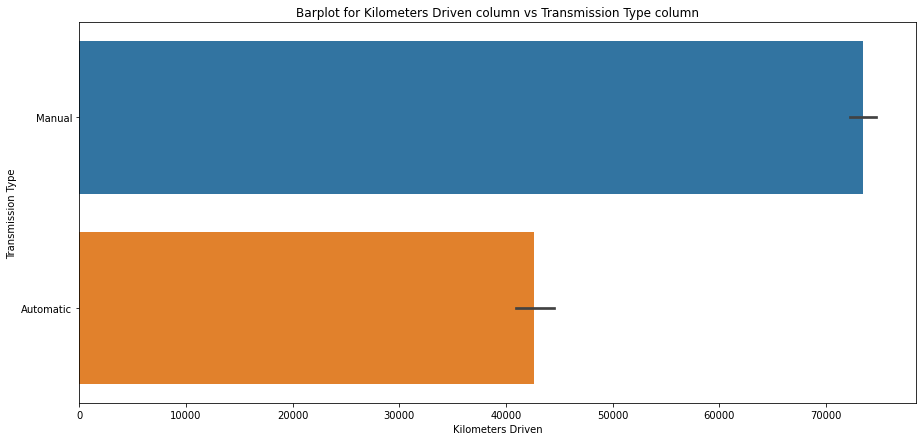

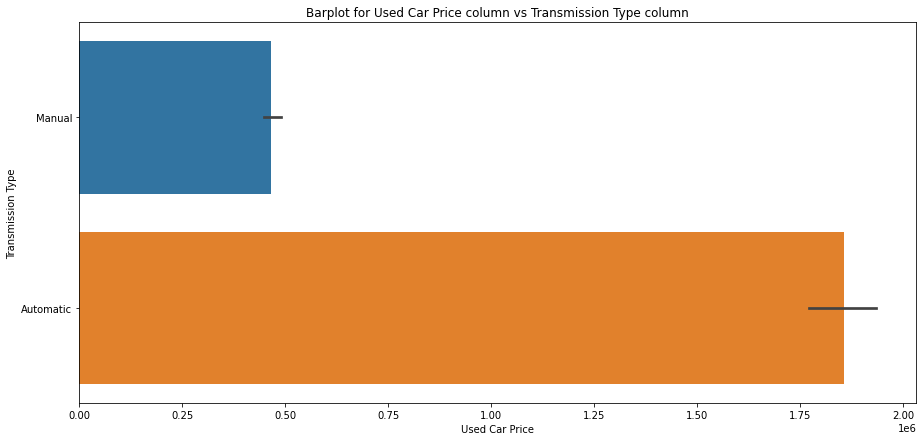

In [24]:
y = 'Transmission Type'

x = 'Year of Manufacture'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'Kilometers Driven'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

x = 'Used Car Price'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot for {x} column vs {y} column")
plt.show()

Observation:<br>
1. Year of manufacture for both manual and automatic gear shifting cars are same<br>
2. Kilometers driven for manual cars are more than that of their automatic counterparts<br>
3. Used Car price for automatic one's are way higher than the manual cars

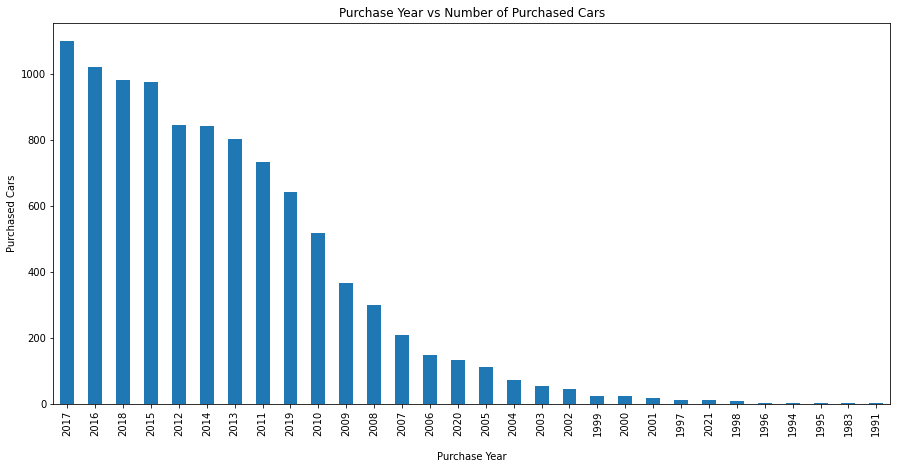

In [25]:
plt.figure(figsize=[15,7])
purchased_car_per_year = df['Year of Manufacture'].value_counts()
purchased_car_per_year.plot(kind='bar')
plt.xlabel("\nPurchase Year")
plt.ylabel("Purchased Cars")
plt.title("Purchase Year vs Number of Purchased Cars")
plt.show()

Observation: The number of cars being purchased each year has increased a lot after 2008. Most of the people started preferring to get used cars and all the available online sources helped in expediting genuine process of getting good quality used cars with hassle free Registration Certificate (RC) transfers.

Pair Plot with Transmission Type legend


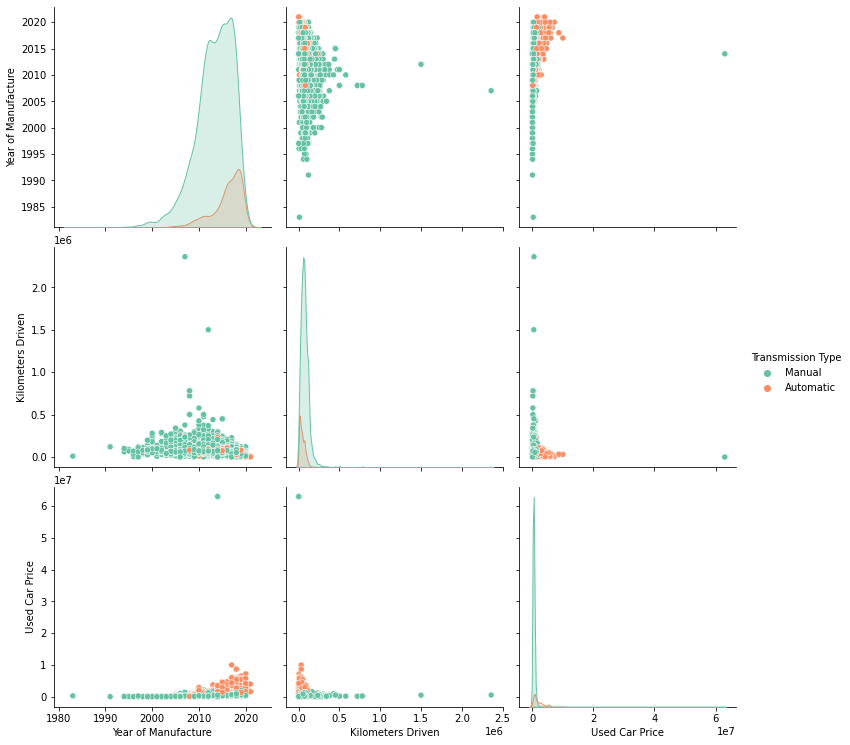

Pair Plot with Fuel Type legend


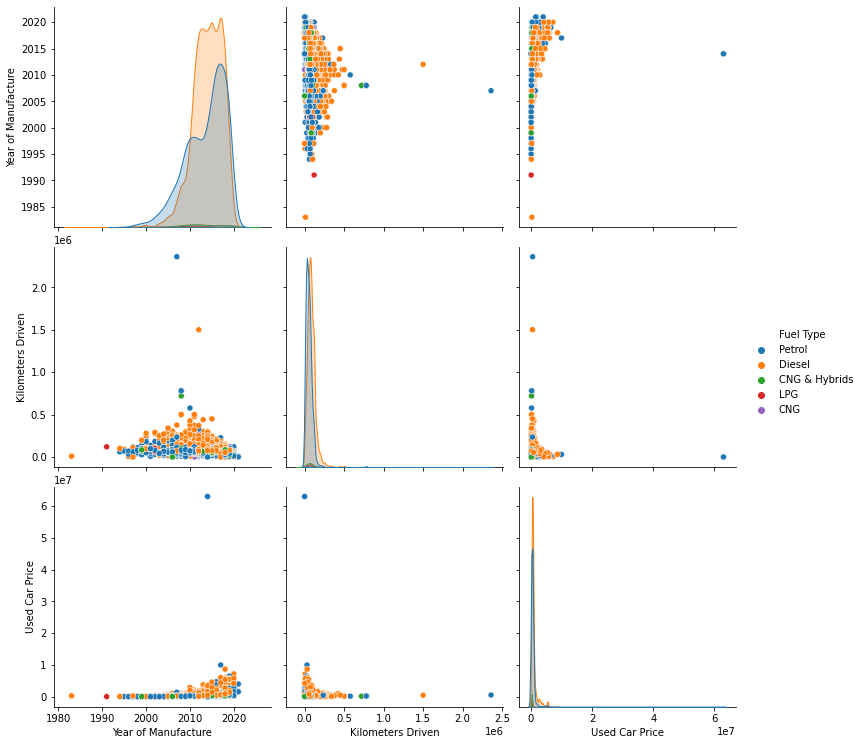

In [26]:
print("Pair Plot with Transmission Type legend")
sns.pairplot(df, hue='Transmission Type', diag_kind="kde", kind="scatter", palette="Set2", height=3.5)
plt.show()
print("Pair Plot with Fuel Type legend")
sns.pairplot(df, hue='Fuel Type', diag_kind="kde", kind="scatter", palette="tab10", height=3.5)
plt.show()

Observation: Above we have generated the pairplots for Transmission Type and Fuel type legends on our numeric data.

Manual transmission type used car fuel details


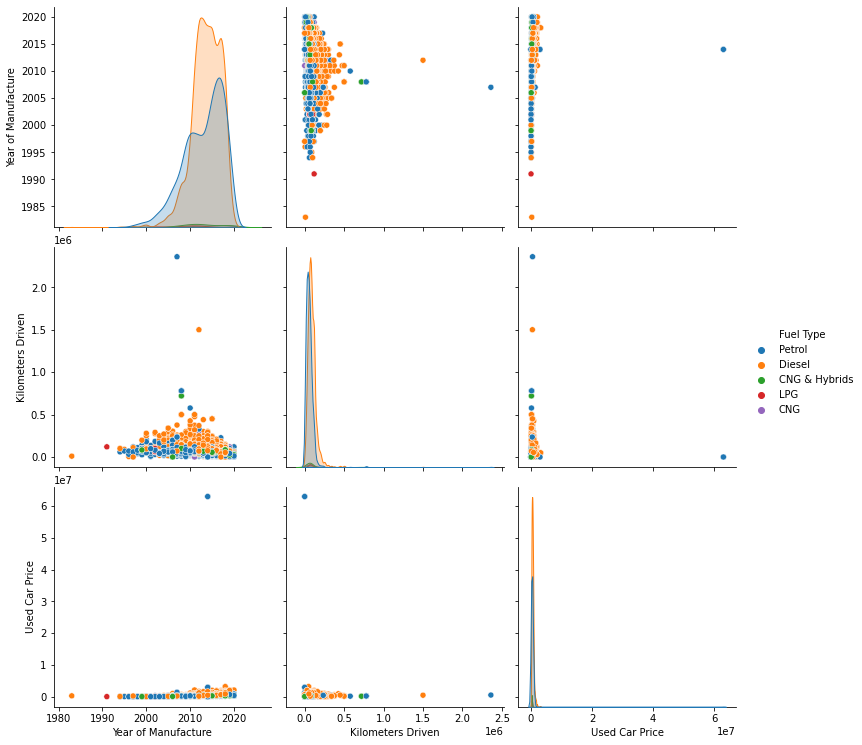

Automatic transmission type used car fuel details


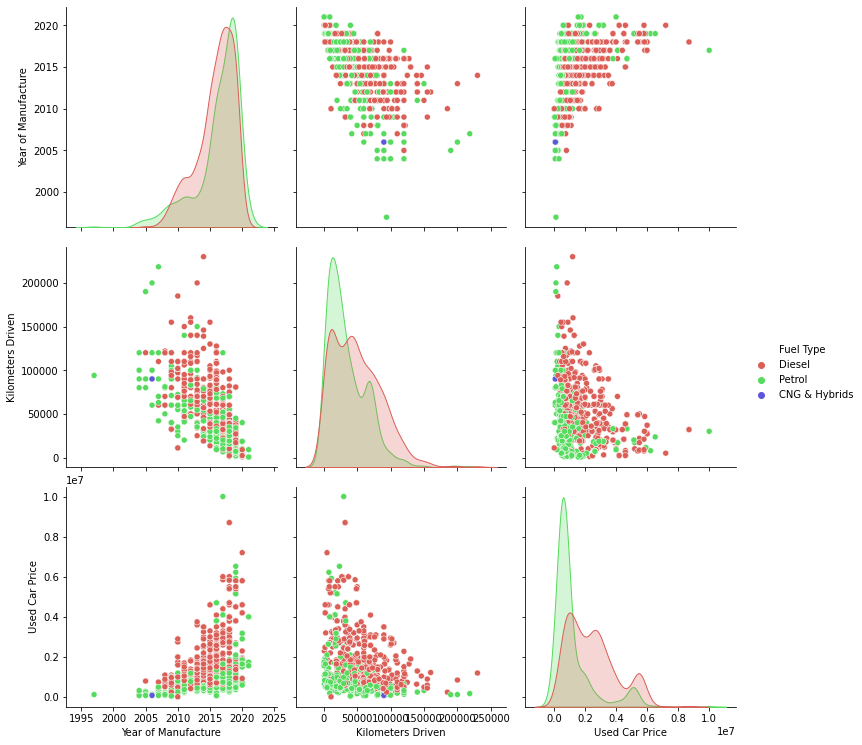

In [27]:
Manual = df[df['Transmission Type']=='Manual']
Automatic = df[df['Transmission Type']=='Automatic']

print('Manual transmission type used car fuel details')
sns.pairplot(Manual, hue='Fuel Type', diag_kind="kde", kind="scatter", palette="tab10", height=3.5)
plt.show()

print('Automatic transmission type used car fuel details')
sns.pairplot(Automatic, hue='Fuel Type', diag_kind="kde", kind="scatter", palette="hls", height=3.5)
plt.show()

Observation: Above we have generated pair plots for Fuel type legends considering the manual and automatic transmission types.

<font size=4><b>Encoding the categorical object datatype columns

In [28]:
# Ordinal Encoder

oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

column=["Transmission Type", "Fuel Type", "Used Car Model"]
df=ordinal_encode(df, column)
df

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type,Used Car Price
0,460.0,2017,2200,4.0,1.0,525000.0
1,460.0,2013,91500,2.0,1.0,595000.0
2,186.0,2017,36000,2.0,1.0,775000.0
3,318.0,2015,90000,2.0,1.0,400000.0
4,1274.0,2010,40000,4.0,1.0,230000.0
...,...,...,...,...,...,...
9995,460.0,2012,65000,4.0,1.0,325000.0
9996,1274.0,2018,85000,1.0,1.0,290000.0
9997,1274.0,2010,72000,4.0,1.0,320000.0
9998,1633.0,2012,70000,2.0,1.0,185000.0


I defined a function to apply OrdinalEncoder on my feature columns to convert the object datatype columns to numeric format.

In [29]:
print("Shape of our data frame post encoding shows {} Rows and {} columns\n".format(df.shape[0], df.shape[1]))

Shape of our data frame post encoding shows 10000 Rows and 6 columns



Checking the number of rows and columns after applying the encoding technique on them.

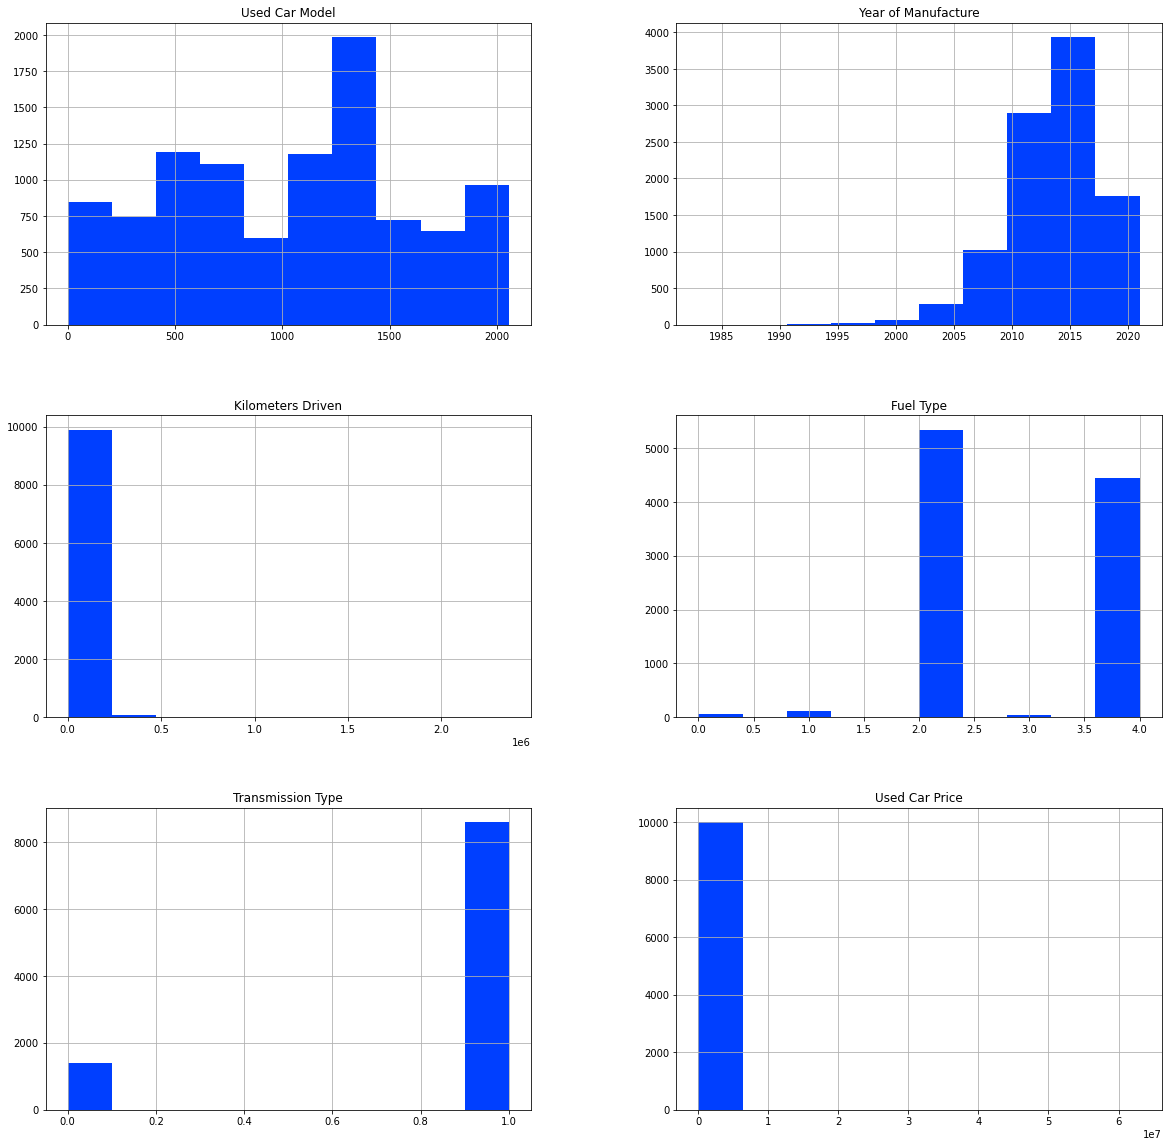

In [30]:
plt.style.use('seaborn-bright')

df.hist(figsize=(20,20))
plt.show()

With the help of above histogram we are able to see the data distribution for our dataset columns.


<font size=5><b>Correlation using a Heatmap

<ul>
    <li>Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
    <li>Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.
</ul>

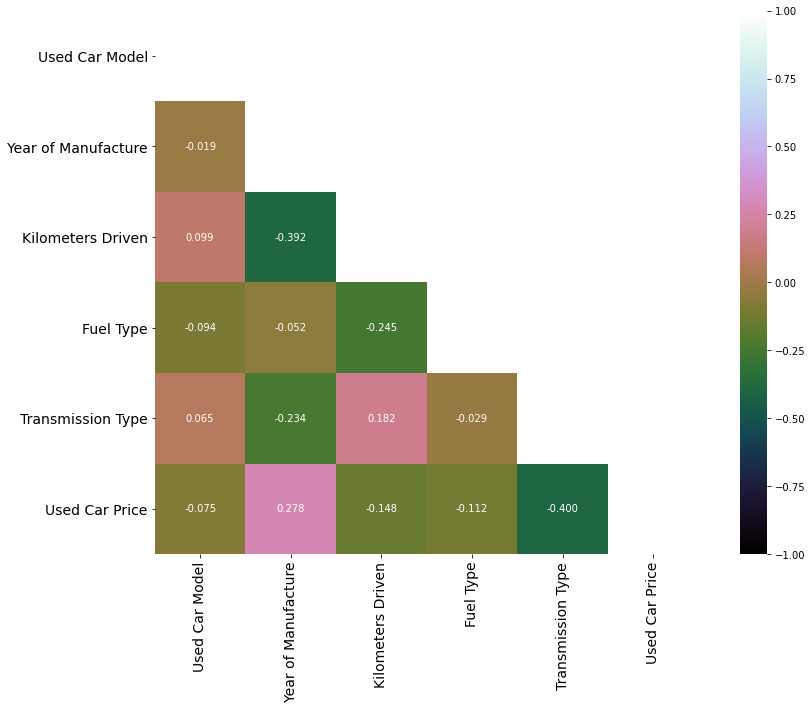

In [31]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In the above correlation heatmap we can see that only "Year of Manufacture" is positively correlated with our label column while the other feature columns are negatively correlated. Also we see no multi collinearity concerns between the feature variables and will not have to worry about the same.

<font size=4><b>Correlation Bar Plot comparing Gender column with the remaining columns

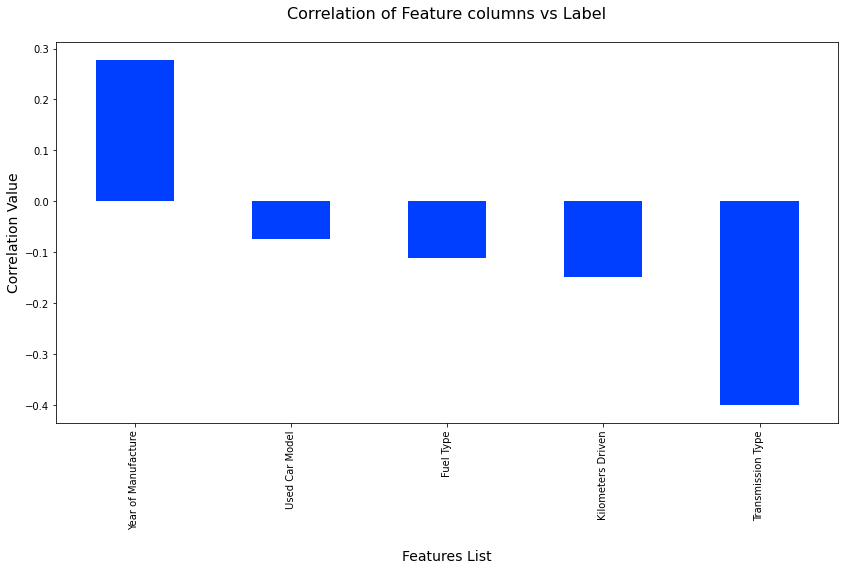

In [32]:
df_corr = df.corr()
plt.figure(figsize=(14,7))
df_corr['Used Car Price'].sort_values(ascending=False).drop('Used Car Price').plot.bar()
plt.title("Correlation of Feature columns vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=14)
plt.show()

Here we have a visual on the positively and negatively correlated feature columns with our target variable.

<font size=5><b>Outliers

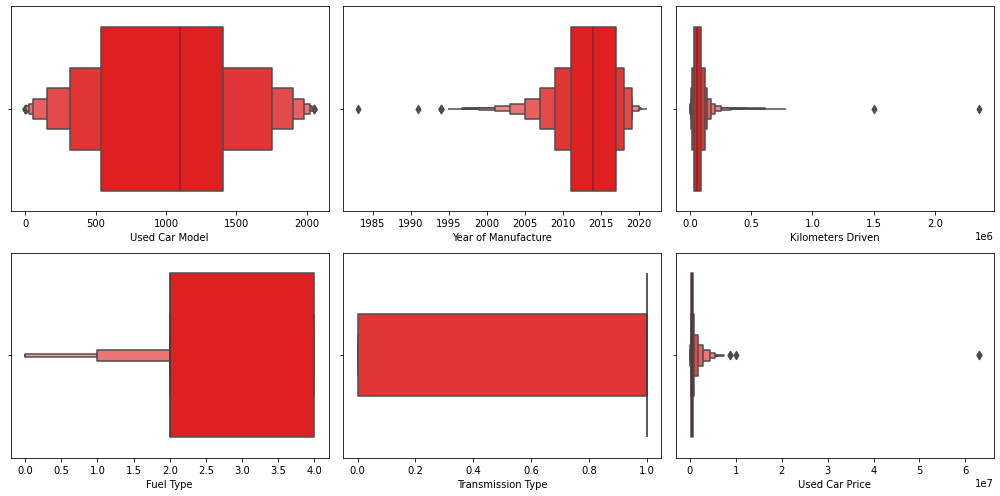

In [33]:
plt.figure(figsize=(14,7))
outl_df = df.columns.values
for i in range(0, len(outl_df)):
    plt.subplot(2, 3, i+1)
    ax = sns.boxenplot(df[outl_df[i]], color='red')
    plt.tight_layout()

We can see that there are few outliers present in our dataset that will need to be treated.

In [34]:
# Using Z Score to remove outliers

z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe nameWe can see that there are few outliers present in our dataset that will need to be treated.

Shape of the dataframe before removing outliers:  (10000, 6)
Shape of the dataframe after removing outliers:  (9660, 6)
Percentage of data loss post outlier removal:  3.4000000000000004


I have used the Z Score method to remove the outliers from our dataset and the percentage of data loss is less than 5%

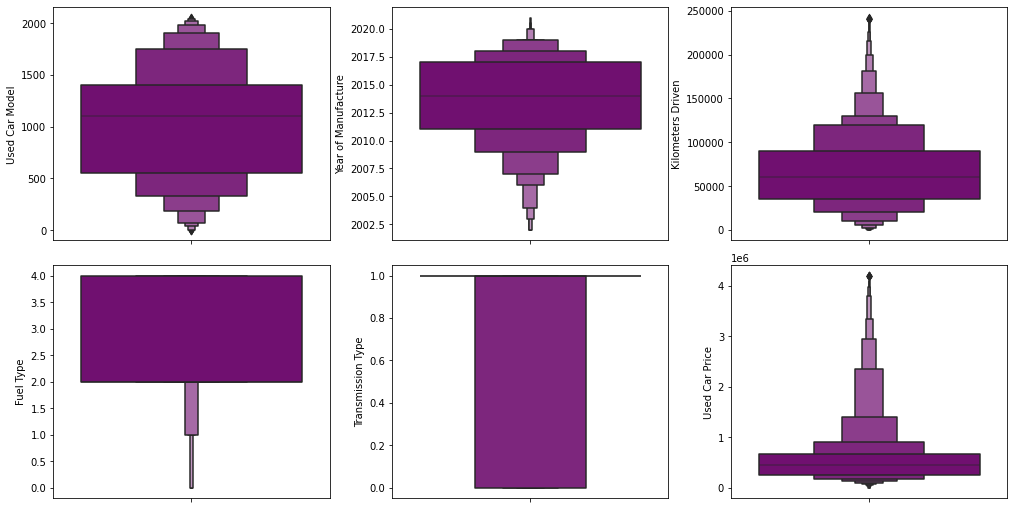

In [35]:
plt.style.use('fast')

fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxenplot(y=col, data=df, ax=ax[index], color="purple")
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

We can confirm that the outlier concern in our dataset has been dealth with efficiently.

<font size=6><b>Skewness

In [36]:
df.skew()

Used Car Model        -0.050582
Year of Manufacture   -0.654635
Kilometers Driven      0.839812
Fuel Type              0.064673
Transmission Type     -2.214140
Used Car Price         3.132993
dtype: float64

With the skew method we see that there are columns present in our dataset that are above the acceptable range of +/-0.5 value.

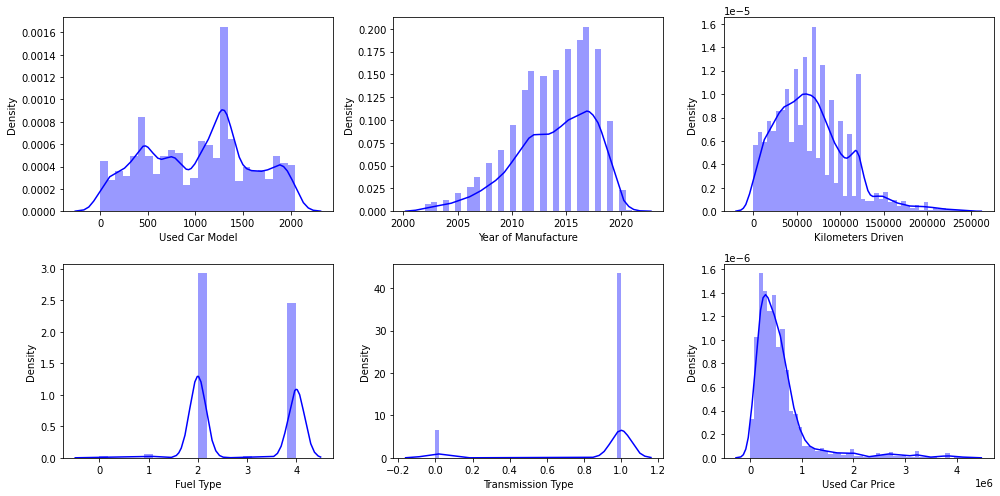

In [37]:
plt.figure(figsize=(14,7))
for i in range(0, len(outl_df)):
    plt.subplot(2, 3, i+1)
    ax = sns.distplot(df[outl_df[i]], color='blue')
    plt.tight_layout()

I see that our target column is the one showing the highest skewness and it won't be much of a concern to us. However I see slight skewness in our feature columns that will need to be treated.

In [38]:
# Using Log Transform to fix skewness

df_log=df.copy()
for col in df_log.columns:
    if df_log.skew().loc[col]>0.55:
        df_log[col]=np.log1p(df_log[col])

I am using the log transformation method to ensure that we get the skewness concerns handled from our feature variables.

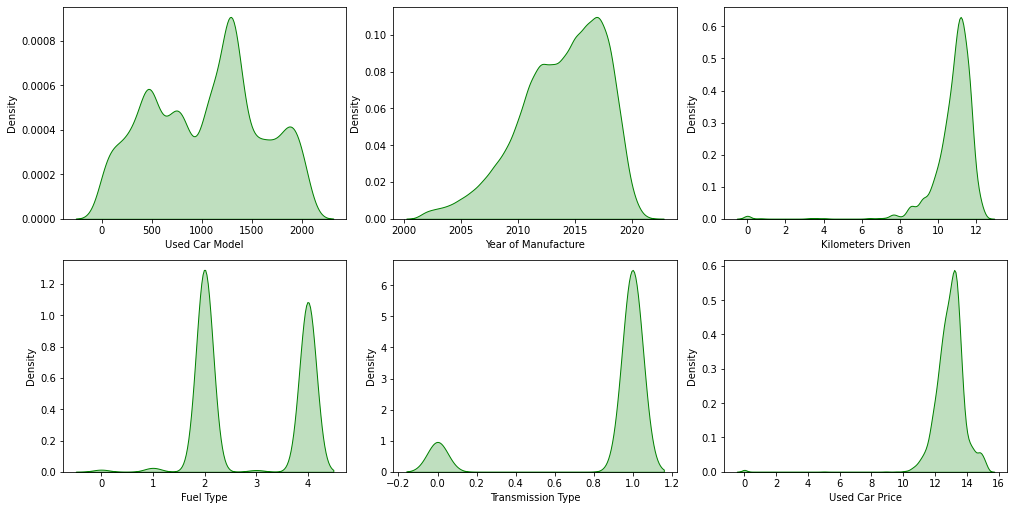

In [39]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(14,7))
index = 0
ax = ax.flatten()
for col, value in df_log.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

<font size=4><b>Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [40]:
X = df_log.drop('Used Car Price', axis=1)
Y = df_log['Used Car Price']

I have bifurcated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

<font size=5><b>Feature Scaling

In [41]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Used Car Model,Year of Manufacture,Kilometers Driven,Fuel Type,Transmission Type
0,-1.049778,0.859016,-2.676651,1.092489,0.38482
1,-1.049778,-0.216389,0.540315,-0.853025,0.38482
2,-1.546103,0.859016,-0.264741,-0.853025,0.38482
3,-1.306997,0.321313,0.526049,-0.853025,0.38482
4,0.424706,-1.022943,-0.173812,1.092489,0.38482


I am scaling my feature data to ensure that there is no issue with the data biasness over a particular column instead a standardization will occur helping us in having a uniform dataset value.

<font size=4><b>Finding the best random state for building Regression Models

In [42]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu*100,"on Random State", maxRS)

Best R2 score is 57.550268240713386 on Random State 251


Here we see that out of the random state value ranging from 1 to 1000 the best random state number found is "251" and we will use this in our ML models.

<font size=5><b>Feature importance bar graph

,Importance
Features,
Year of Manufacture,0.363
Kilometers Driven,0.317
Used Car Model,0.160
Transmission Type,0.094
Fuel Type,0.066


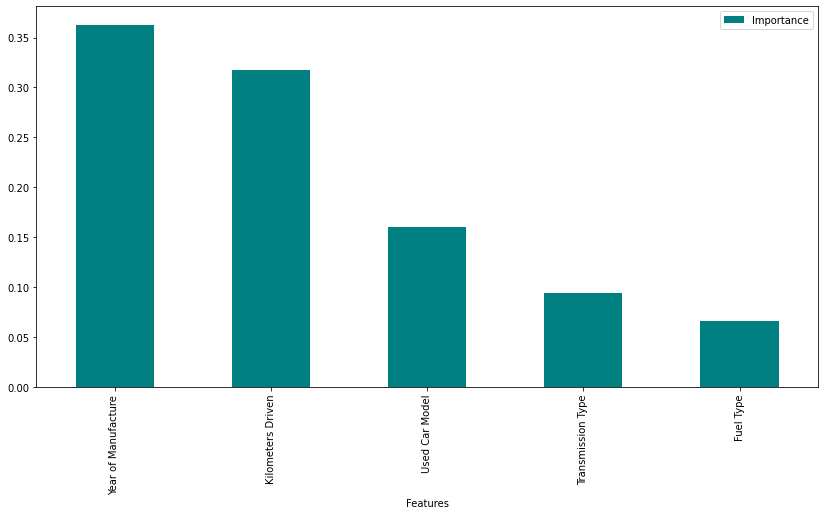

In [43]:
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
plt.rcParams["figure.figsize"] = (14,7)
importances.plot.bar(color='teal')
importances

In the above cell we can the columns arranged in descending order as per their importance weightage while predicting our label variable.

<font size=5><b>Machine Learning Model for Regression with Evaluation Metrics

In [44]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=251)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have built a regression function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [45]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 0.605556335239326
R2 Score is: 57.550268240713386
Cross Validation Score: 52.87533760521492
R2 Score - Cross Validation Score is 4.6749306354984626


Created the linear regression model and checked for all it's evaluation metrics as well.

In [46]:
# Ridge Regularization

model=Ridge(alpha=1e-2, normalize=True)
reg(model, X, Y)

RMSE Score is: 0.6054680731075806
R2 Score is: 57.56264175759676
Cross Validation Score: 52.93925429374748
R2 Score - Cross Validation Score is 4.6233874638492765


Created the ridge regression model and checked for all it's evaluation metrics as well.

In [47]:
# Lasso Regularization

model=Lasso(alpha=1e-2, normalize=True, max_iter=1e5)
reg(model, X, Y)

RMSE Score is: 0.9298915333170628
R2 Score is: -0.099160034407908
Cross Validation Score: -0.5134623856097242
R2 Score - Cross Validation Score is 0.41430235120181624


Created the lasso regression model and checked for all it's evaluation metrics as well.

In [48]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 0.6090026450105932
R2 Score is: 57.06571805196084
Cross Validation Score: 52.23304894606573
R2 Score - Cross Validation Score is 4.832669105895114


Created the Support Vector Regression model and checked it's evaluation metrics.

In [49]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.4415720834474327
R2 Score is: 77.42805078300164
Cross Validation Score: 70.95397325483471
R2 Score - Cross Validation Score is 6.47407752816693


Created the Decision Tree Regressor model and checked it's evaluation metrics.

In [50]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 0.6568736526202565
R2 Score is: 50.05068561974439
Cross Validation Score: 47.44247248854471
R2 Score - Cross Validation Score is 2.6082131311996832


Created the Random Forest Regressor model and checked it's evaluation metrics.

In [51]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 0.6566728427783805
R2 Score is: 50.0812205048682
Cross Validation Score: 46.36383684899321
R2 Score - Cross Validation Score is 3.7173836558749898


Created the K Neighbors Regressor model and checked it's evaluation metrics.

In [52]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 0.7223152547514011
R2 Score is: 39.60243635886398
Cross Validation Score: 43.58497031433316
R2 Score - Cross Validation Score is -3.9825339554691794


Created the Gradient Boosting Regressor model and checked it's evaluation metrics.

In [53]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 0.6020206872686222
R2 Score is: 58.04452168526095
Cross Validation Score: 52.331856070405145
R2 Score - Cross Validation Score is 5.712665614855808


Created the Ada Boost Regressor model and checked it's evaluation metrics.

In [54]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 0.3634167124760554
R2 Score is: 84.71112123136304
Cross Validation Score: 80.29248931831685
R2 Score - Cross Validation Score is 4.418631913046184


Created the Extra Trees Regressor model and checked it's evaluation metric

<font size=5><b>Hyper parameter tuning

In [56]:
# Choosing Extra Trees Regressor

fmod_param = {'n_estimators' : [100, 200, 300],
              'criterion' : ['squared_error', 'mse', 'absolute_error', 'mae'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [42, 251, 340]
              }

In [57]:
GSCV = GridSearchCV(ExtraTreesRegressor(), fmod_param, cv=5)

In [58]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [42, 251, 340]})

After comparing all the regression models I have selected Extra Trees Regressor as my best model and have listed down it's parameters above referring the sklearn webpage. I am using the Grid Search CV method for hyper parameter tuning my best model. Also I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.

In [59]:
GSCV.best_params_

{'criterion': 'squared_error',
 'n_estimators': 300,
 'n_jobs': -1,
 'random_state': 42}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.

In [60]:
Final_Model = ExtraTreesRegressor(criterion='mse', n_estimators=300, n_jobs=-1, random_state=42)
Model_Training = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 73.454790823603


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it.

<font size=5><b>Prediction of Used Car Price

In [61]:
Predicted_Price = Final_Model.predict(X)
# Reversing the Log Transformation that was performed on the Target column while training the ML Model
Predicted_SalePrice = np.exp(Predicted_Price)
# Checking the predicted price details in dataframe format
predicted_output = pd.DataFrame()
predicted_output['Used Car Price Predicted'] = Predicted_SalePrice
predicted_output['Used Car Price Actual'] = df["Used Car Price"]
predicted_output

,Used Car Price Predicted,Used Car Price Actual
0,525001.000000,525000.0
1,632390.820721,595000.0
2,775001.000000,775000.0
3,400001.000000,400000.0
4,230001.000000,230000.0
...,...,...
9655,325001.000000,250000.0
9656,306108.612181,225000.0
9657,320001.000000,215000.0
9658,199437.709576,210000.0


Here we have created a dataframe that shows us the predicted used car prices and the actual used car prices that was obtained by scraping data from the websites.

<font size=5><b>Saving the best model

In [62]:
filename = "UsedCarPricePrediction.pkl"
joblib.dump(Final_Model, filename)

['UsedCarPricePrediction.pkl']

Finally, I am saving my best regression model using the joblib library.

<font size=6><b>Inference:

<ul>
    <li>After the completion of this project we got an insight on how to collect data, pre-processing the data, analysing the data and building a model.
    <li>First we collected the used cars data from different websites like olx, cardekho, cars24, ola etc and it was done by using Web Scraping. The framework used for web scraping was Beautiful Soup and Selenium, which has an advantage of automating our process of collecting data.
    <li>We collected almost 10000 of data which contained the selling price and other related features of used cars.    
    <li>Then the scrapped data was combined in a single data frame and saved in a csv file so that we can open it and analyse the data.
    <li>We did data cleaning, data-preprocessing steps like finding and handling null values, removing words from numbers, converting object to int type, data visualization, handling outliers and skewness etc.
    <li>After separating our train and test data, we started running different machine learning regression algorithms to find out the best performing model.
    <li>We found that Extra Tree Regressor Algorithm was performing well according to their r2_score and cross validation scores.
    <li>Then we performed Hyperparameter Tuning technique using GridSearchCV for getting the best parameters and improving the score. In that Extra Tree Regressor Algorithm did not perform quite well as previously on the defaults but we finalised that model for further predictions as it was still better than the rest.
    <li>We saved the final model in pkl format using the joblib library after getting a dataframe of predicted and actual used car price details.
</ul>        

<font size=5><b>The problems we faced during this project were:

<ul>
    <li><b>The website was poorly designed because the scrapping took a lot of time and there were many issues in accessing to next page. Also need further practise in terms of various web scraping techniques. More negative correlated data were present than the positive correlated one's. Presence of outliers and skewness were detected and while dealing with them we had to lose a bit of valuable data. No information for handling these fast-paced websites were provided so that was consuming more time in web scraping part.
</ul>
